In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/apusdigital/flisol-2023/main/datasets/AAPL.csv'

# Carrega os dados do arquivo CSV
df = pd.read_csv(url, index_col='Date', parse_dates=True)

# Calcula os retornos diários
df['Return'] = df['Close'].pct_change()

# Calcula o retorno diário médio
daily_return_mean = df['Return'].mean()
print("Retorno diário médio:", daily_return_mean)

# Calcula a volatilidade histórica
daily_volatility = df['Return'].std()
print("Volatilidade histórica:", daily_volatility)


Retorno diário médio: -0.004700511517994327
Volatilidade histórica: 0.012989624617195269


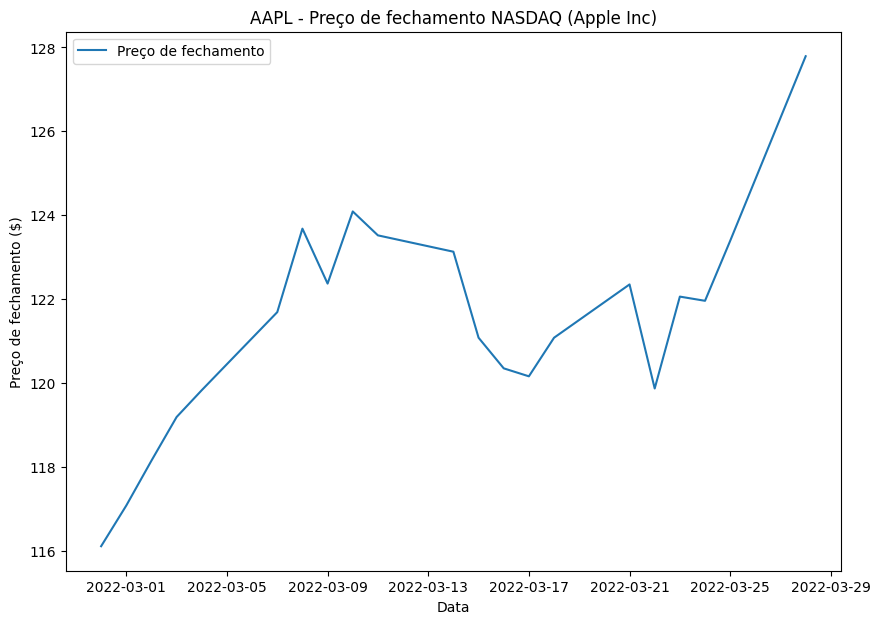

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/apusdigital/flisol-2023/main/datasets/AAPL.csv'

# Carrega os dados do arquivo CSV
df = pd.read_csv(url, index_col='Date', parse_dates=True)

# Cria um gráfico de linhas
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df.index, df['Close'], label='Preço de fechamento')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento ($)')
ax.set_title('AAPL - Preço de fechamento NASDAQ (Apple Inc)')
ax.legend()

# Mostra o gráfico
plt.show()


In [ ]:
import yfinance as yf

# Obter dados da ação AAPL
stock = yf.Ticker("AAPL")

# Obter informações gerais sobre a ação
info = stock.info

# Imprimir informações sobre a ação
print(info['symbol'])
print(info['language'])
print(info['currency'])
print('\n')

# Obter o histórico de dividendos
dividendos = stock.dividends

# Imprimir o histórico de dividendos
print(dividendos)



AAPL
en-US
USD


Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-02-04 00:00:00-05:00    0.220000
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
Name: Dividends, Length: 78, dtype: float64


In [ ]:
import yfinance as yf
import pandas as pd

# Lista de ações a serem analisadas
tickers = ['AAPL', 'MSFT', 'AMZN']

# Data de início e fim da coleta de dados
start_date = '2020-01-01'
end_date = '2022-03-29'

# Coleta de dados
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Renomear colunas com os nomes das ações
data.columns = tickers

# Visualização dos dados coletados
print(data.head())

[*********************100%***********************]  3 of 3 completed
                 AAPL       MSFT        AMZN
Date                                        
2020-01-02  75.087502  94.900497  160.619995
2020-01-03  74.357498  93.748497  158.619995
2020-01-06  74.949997  95.143997  159.029999
2020-01-07  74.597504  95.343002  157.580002
2020-01-08  75.797501  94.598503  160.089996


In [ ]:
import requests
from bs4 import BeautifulSoup

# Define a URL do site de onde queremos extrair os dados
url = 'https://finance.yahoo.com/quote/AAPL?p=AAPL'

# Faz a requisição HTTP para a URL e obtém o conteúdo da página
response = requests.get(url)
html_content = response.content

# Cria um objeto BeautifulSoup com o conteúdo da página
soup = BeautifulSoup(html_content, 'html.parser')

# Extrai o preço atual da ação da Apple (AAPL) e exibe na tela
price_element = soup.find('fin-streamer', {'class': 'Fw(b) Fz(36px) Mb(-4px) D(ib)'})

# Imprime o elemento completo
print(price_element)

# Imprime somente o preco atual da ação
price = price_element.text
print('Preço da ação da Apple (AAPL):', price)


<fin-streamer active="" class="Fw(b) Fz(36px) Mb(-4px) D(ib)" data-field="regularMarketPrice" data-pricehint="2" data-symbol="AAPL" data-test="qsp-price" data-trend="none" value="163.065">163.07</fin-streamer>
Preço da ação da Apple (AAPL): 163.07


In [ ]:
import yfinance as yf
import plotly.graph_objs as go

# Define as ações que queremos visualizar
tickers = ['AAPL', 'GOOG', 'MSFT']

# Define o intervalo de datas para o qual queremos obter os dados
start_date = '2020-01-01'
end_date = '2021-12-31'

# Obtém os dados das ações utilizando o yfinance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Cria um gráfico interativo com o plotly
fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter(x=data.index, y=data[ticker], name=ticker, line=dict(width=2),))

fig.update_layout(
    title='Preços das ações',
    xaxis_title='Data',
    yaxis_title='Preço (USD)',
    xaxis_rangeslider_visible=True,
    height=600,
)

fig.show()


[*********************100%***********************]  3 of 3 completed


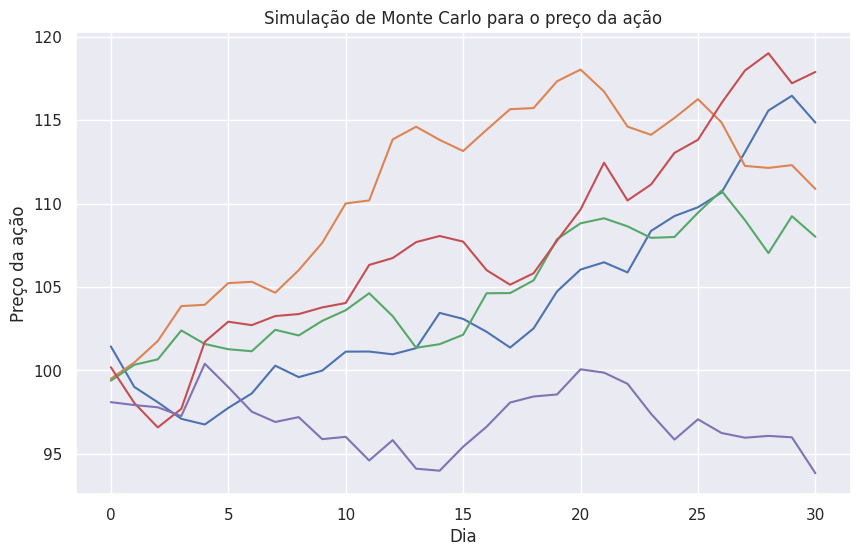

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define os parâmetros da simulação
S = 100  # Preço inicial da ação
mu = 0.1  # Retorno médio diário
sigma = 0.2  # Volatilidade diária
dt = 1/252  # Intervalo de tempo (um dia)

# Define o número de simulações e o número de dias a serem simulados
num_simulacoes = 5
num_dias = 31

# Gera uma matriz com números aleatórios normalmente distribuídos
# (correspondentes aos retornos diários da ação)
r = np.random.normal((mu*dt), (sigma*np.sqrt(dt)), (num_dias, num_simulacoes))

# Calcula o preço da ação para cada simulação e cada dia
preco = S * np.exp(np.cumsum(r, axis=0))

# Plota o gráfico das simulações de Monte Carlo
plt.figure(figsize=(10, 6))
plt.plot(preco)
plt.xlabel('Dia')
plt.ylabel('Preço da ação')
plt.title('Simulação de Monte Carlo para o preço da ação')
plt.show()


In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4553555212738941057
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14343274496
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9020637400098626012
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [2]:
!cat /proc/meminfo

MemTotal:       13297200 kB
MemFree:         7481488 kB
MemAvailable:   11137256 kB
Buffers:          337236 kB
Cached:          3492680 kB
SwapCached:            0 kB
Active:           643140 kB
Inactive:        4784784 kB
Active(anon):       1080 kB
Inactive(anon):  1585968 kB
Active(file):     642060 kB
Inactive(file):  3198816 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               188 kB
Writeback:             0 kB
AnonPages:       1598064 kB
Mapped:           730396 kB
Shmem:             11628 kB
KReclaimable:     112688 kB
Slab:             155140 kB
SReclaimable:     112688 kB
SUnreclaim:        42452 kB
KernelStack:        4384 kB
PageTables:        19124 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648600 kB
Committed_AS:    3732120 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       76848 kB
VmallocChunk:          0 kB
Percpu:          